In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DatasetClass import DatasetPt
from ModelClass import RegressionModel
from src.helpers import pick_only_target, extract_data

erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_path=erik_data)
dataset.load_data()

model = RegressionModel(dataset=dataset)
model.prepare_dataset()
model.load()

2025-07-14 22:29:16.688750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752524956.703813 3089144 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752524956.707690 3089144 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-14 22:29:16.723438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available GPUs: []
Batching datasets...


2025-07-14 22:29:20.310853: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model loaded from /home/kvake/HiggsAnalysisBc/models/PtNet_mmc.keras


In [2]:
higgs_pt = []

for features,target in dataset.val_dataset:
    # print("Features shape:", features[11])
    higgs_pt.append(features[11].numpy())
    # print("Target shape:", target)

pred = model.model.predict(dataset.val_dataset.batch(100000)).flatten()

2025-07-14 22:33:55.206679: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1752525236.586673 3099649 service.cc:148] XLA service 0x7fb9f000e8c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752525236.586725 3099649 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-07-14 22:33:56.598189: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752525236.767784 3099649 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


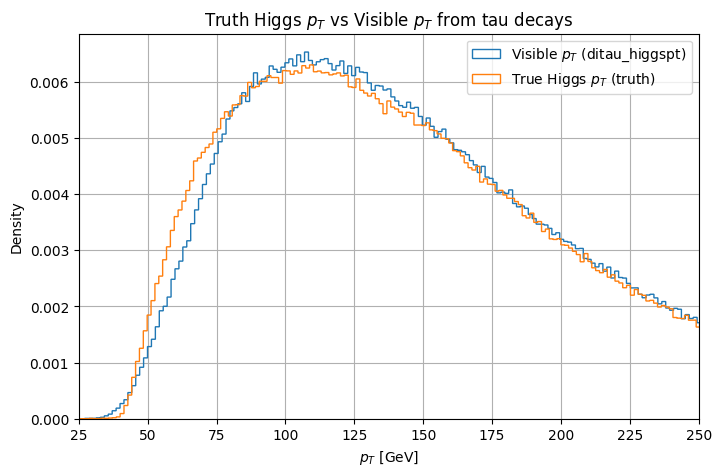

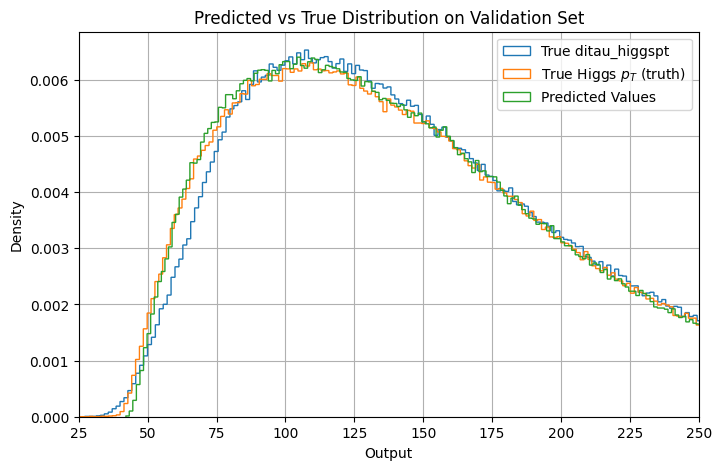

In [22]:
import numpy as np
import matplotlib.pyplot as plt

higgs_truth_pt = []

for features, target in dataset.val_dataset.batch(10000):    # ditau_higgspt
    higgs_truth_pt.extend(target.numpy())         # truth_boson_p4.rho

# ditau_visible_pt = []

# for features,target in dataset.val_dataset:
#     # print("Features shape:", features[11])
#     ditau_visible_pt.append(features[11].numpy())
#     # print("Target shape:", target)

# Konverzia na numpy polia
ditau_visible_pt = np.array(ditau_visible_pt)
# higgs_truth_pt = np.array(higgs_truth_pt)

# Vykreslenie histogramov
plt.figure(figsize=(8, 5))
plt.hist(np.array(higgs_pt), bins=1000, histtype='step', label='Visible $p_T$ (ditau_higgspt)', density=True)
plt.hist(higgs_truth_pt, bins=1000, histtype='step', label='True Higgs $p_T$ (truth)', density=True)
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Density")
plt.title("Truth Higgs $p_T$ vs Visible $p_T$ from tau decays")
plt.legend()
plt.grid(True)
plt.xlim(25, 250)
plt.show()


plt.figure(figsize=(8, 5))
plt.hist(np.array(higgs_pt), bins=1000, histtype='step', label='True ditau_higgspt', density=True)
plt.hist(higgs_truth_pt, bins=1000, histtype='step', label='True Higgs $p_T$ (truth)', density=True)
plt.hist(np.array(pred), bins=1000, histtype='step', label='Predicted Values', density=True)
plt.xlabel("Output")
plt.ylabel("Density")
plt.title("Predicted vs True Distribution on Validation Set")
plt.xlim(25, 250)
# plt.ylim(0, 0.05)
plt.legend()
plt.grid(True)
# plt.savefig("predicted_vs_true_distribution.png", dpi=300)


(815463,) (815463,)


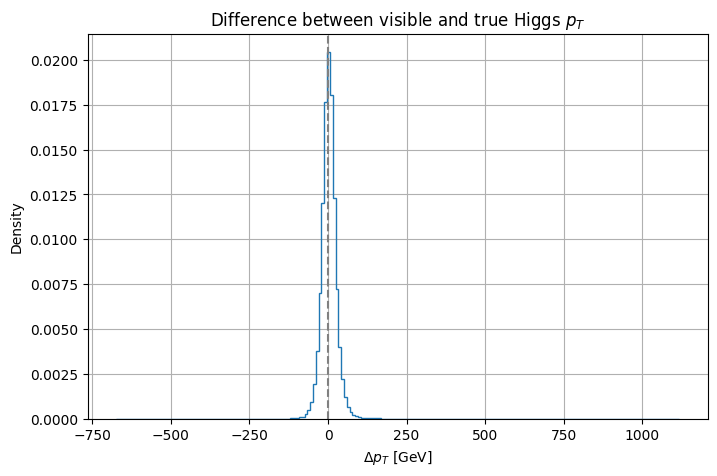

In [25]:
import numpy as np
import matplotlib.pyplot as plt

ditau_visible_pt = []
higgs_truth_pt = []

for features, target in dataset.val_dataset.batch(10000):
    ditau_visible_pt.extend(features[:, 11].numpy())    # ditau_higgspt
    higgs_truth_pt.extend(target.numpy())               # už je to len skalár, nie vektor

# Konverzia na numpy polia
ditau_visible_pt = np.array(ditau_visible_pt)
higgs_truth_pt = np.array(higgs_truth_pt)

# Overenie rovnakého tvaru
print(ditau_visible_pt.shape, higgs_truth_pt.shape)

# Výpočet rozdielu
delta_pt = ditau_visible_pt - higgs_truth_pt

# Vykreslenie rozdielovej distribúcie
plt.figure(figsize=(8, 5))
plt.hist(delta_pt, bins=200, histtype='step', density=True)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel(r"$\Delta p_T$ [GeV]")
plt.ylabel("Density")
plt.title("Difference between visible and true Higgs $p_T$")
plt.grid(True)
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from DatasetClass import DatasetPt
from ModelClass import RegressionModel
from src.helpers import pick_only_target, extract_data

erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_paths=erik_data)
dataset.load_data()

feature_index = dataset.variables_higgs.index("ditau_higgspt")
print("Feature index:", feature_index)
higgs_pt = []

for features,target in dataset.val_dataset.take(5):
    print("Features:", features)
    print("Feature ditau_higgspt:", features[feature_index])

Feature index: 5
Features: tf.Tensor(
[ 1.37355896e+02  4.58340943e-01 -2.31630638e-01 -3.30362468e-06
  4.33227425e+01  8.81887615e-01 -1.70803463e+00  1.05658375e-01
  4.23546672e-01  1.47640395e+00  1.53595591e+00  1.70754166e+02
  1.80678635e+02  1.39059006e+02 -4.70488846e-01  2.51743889e+00
  1.10919428e+01  3.38925743e+01  4.15418959e+00 -2.50977087e+00
  1.52587891e-05  1.52986526e+02  2.58751225e+00  2.72968006e+00
  6.91880981e+02  2.29326038e+01  0.00000000e+00 -4.58519518e-01
 -5.32382447e-03  2.00000000e+00  2.00000000e+00  1.00000000e+00
  0.00000000e+00  1.00000000e+00  1.00000000e+00  1.47301682e+02], shape=(36,), dtype=float32)
Feature ditau_higgspt: tf.Tensor(0.8818876, shape=(), dtype=float32)
Features: tf.Tensor(
[ 1.7031258e+02 -1.7811326e+00  1.4642797e+00  7.6293945e-06
  8.8968422e+01 -2.2914264e+00  2.1359832e+00  5.3947965e-06
  5.1029384e-01  6.7170358e-01  8.4355527e-01  2.8681549e+02
  2.5928101e+02  2.1384258e+02 -2.6290815e+00 -1.5833583e+00
  2.1762077e+

2025-07-07 20:33:30.399054: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
print("Predictions shape:", pred.shape)
print("Higgs pt shape:", np.array(higgs_pt).shape)

Predictions shape: (815463,)
Higgs pt shape: (815463,)


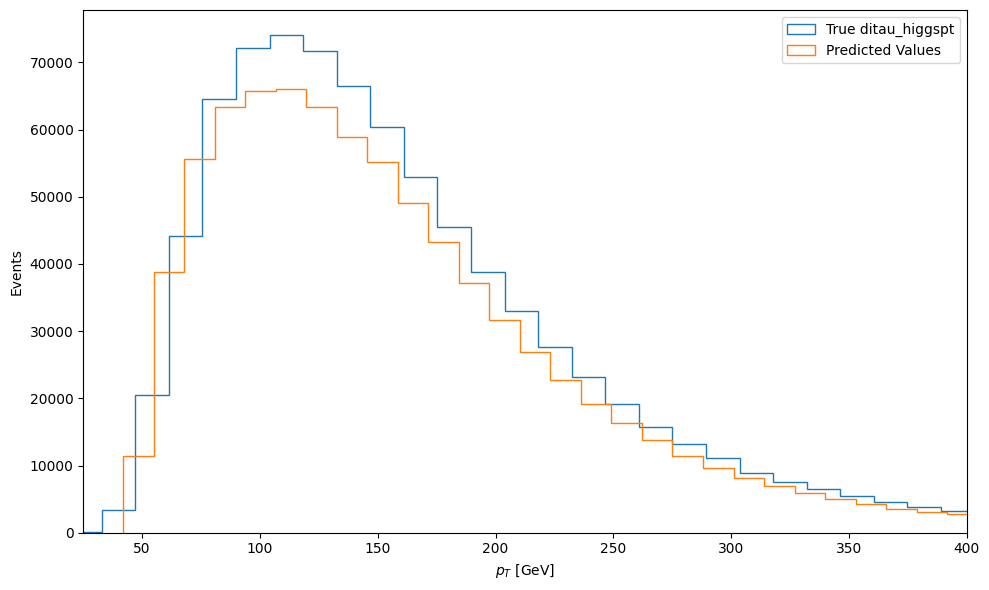

In [11]:
plt.figure(figsize=(10,6))
plt.hist(np.array(higgs_pt), bins=100, histtype='step', label='True ditau_higgspt', density=False)
plt.hist(np.array(pred), bins=100, histtype='step', label='Predicted Values', density=False)
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Events")
# plt.title("Predicted vs True Distribution on Validation Set")
plt.xlim(25, 400)
# plt.ylim(0, 0.05)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig("predicted_vs_true_distribution.png", dpi=300)

/tmp/ipykernel_3074128/4209859402.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


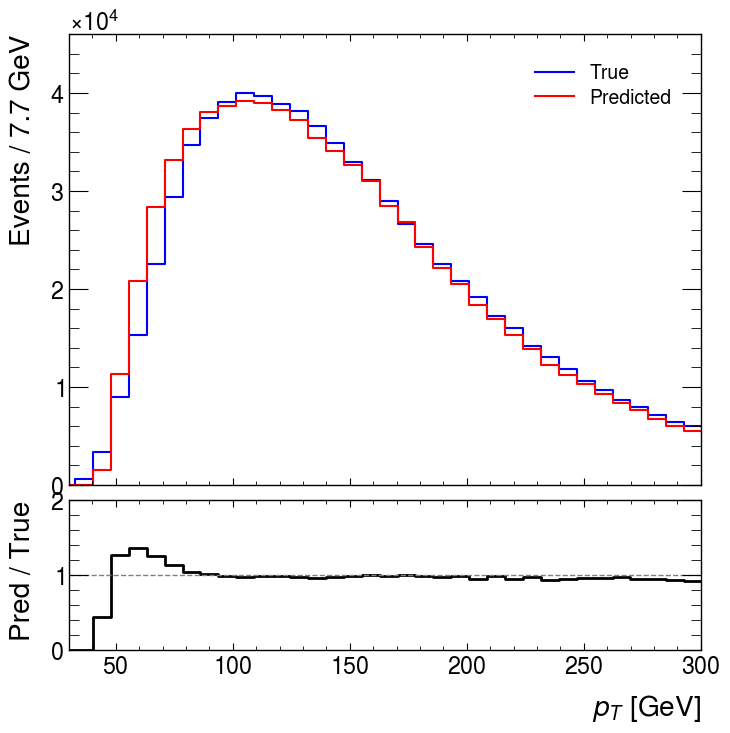

In [75]:
import sys
sys.path.append("/home/kvake/.local/lib/python3.9/site-packages")

import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep

mpl.rcParams['text.usetex'] = False  # zakázať LaTeX renderovanie

mplhep.style.use("ATLAS")


# --- vstupné dáta ---
# tvoje numpy polia
higgs_pt_true = np.array(higgs_pt)  # napr. ground truth
higgs_pt_pred = np.array(pred)      # predikcie modelu

# --- binovanie ---
bins = np.linspace(25, 400, 50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# --- histogramy ---
counts_true, _ = np.histogram(higgs_pt_true, bins=bins)
counts_pred, _ = np.histogram(higgs_pt_pred, bins=bins)

# --- pomer ---
# pozor na delenie nulou
ratio = np.divide(counts_pred, counts_true, out=np.zeros_like(counts_true, dtype=float), where=counts_true != 0)

# --- kreslenie ---
fig, (ax_top, ax_bot) = plt.subplots(
    2, 1, sharex=True, figsize=(8, 8), gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05}
)

# použitie ATLAS štýlu
mplhep.style.use("ATLAS")


# horný panel
ax_top.step(bin_centers, counts_true, where='mid', label="True", color="blue", linewidth=1.5)
ax_top.step(bin_centers, counts_pred, where='mid', label="Predicted", color="red", linewidth=1.5)
ax_top.set_ylabel("Events / {:.1f} GeV".format(bins[1]-bins[0]))
ax_top.legend()
ax_top.set_ylim(0, 1.15 * counts_true.max())  # nastav výšku y-osi podľa maximálnej hodnoty
# Orez rozsahu p_T
ax_bot.set_xlim(30, 300)  # alebo iný podľa preferencie

# # Úprava výšky y-osi horného panelu podľa nového rozsahu dát
# visible_counts = counts_true[(bin_centers >= 50)]
# ax_top.set_ylim(0, 1.15 * visible_counts.max())


# dolný panel: pomer
ax_bot.step(bin_centers, ratio, where='mid', color='black')
ax_bot.axhline(1.0, color='gray', linestyle='--', linewidth=1)
ax_bot.set_ylabel("Pred / True")
ax_bot.set_xlabel(r"$p_T$ [GeV]")
ax_bot.set_ylim(0, 2)  # nastav rozsah podľa pomerov

# uloženie a zobrazenie
plt.tight_layout()
plt.show()

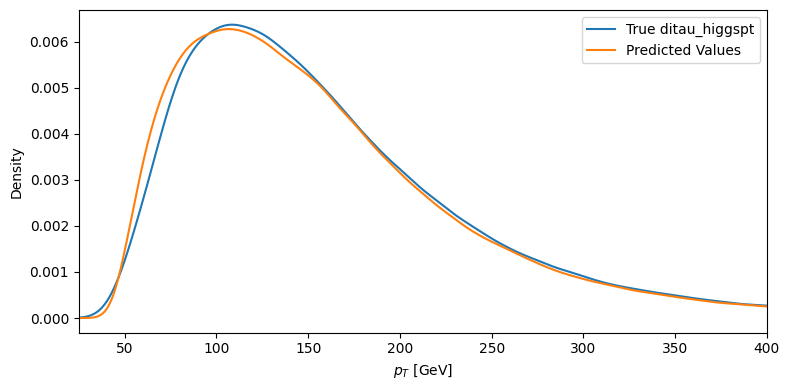

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Predpokladáme, že máš tieto dve polia už pripravené:
# pred = výstupy modelu
# higgs_pt = hodnoty ditau_higgspt (napr. features[11] z val_datasetu)

# KDE vyhladzovanie (hustoty pravdepodobnosti)
kde_true = gaussian_kde(higgs_pt)
kde_pred = gaussian_kde(pred)

# Definuj rozsah hodnôt pre vykreslenie
x_vals = np.linspace(25, 400, 1000)

# Spočítaj hustoty
true_density = kde_true(x_vals)
pred_density = kde_pred(x_vals)

# Vykreslenie vyhladených distribúcií
plt.figure(figsize=(8, 4))
plt.plot(x_vals, true_density, label='True ditau_higgspt', linewidth=1.5)
plt.plot(x_vals, pred_density, label='Predicted Values', linewidth=1.5)
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Density")
plt.xlim(25, 400)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig("predicted_vs_true_distribution_kde.png", dpi=300)
plt.show()


In [71]:
(400-25)/50

7.5

In [3]:
model_outputs = []
ditau_visible_pt = []

# Ne-batchovaný for cyklus – istota 1:1 porovnania
for features, _ in dataset.val_dataset:
    prediction = model.model(np.expand_dims(features, axis=0)).numpy().flatten()[0]
    model_outputs.append(prediction)
    ditau_visible_pt.append(features[11].numpy())

# Na numpy
model_outputs = np.array(model_outputs)
ditau_visible_pt = np.array(ditau_visible_pt)

# Rozdiel
delta = ditau_visible_pt - model_outputs

# Distribúcie
plt.figure(figsize=(10, 6))
plt.hist(ditau_visible_pt, bins=200, histtype='step', label='True ditau_higgspt', density=True)
plt.hist(model_outputs, bins=200, histtype='step', label='Model Output', density=True)
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Density")
plt.title("Model Output vs ditau_higgspt")
plt.legend()
plt.grid(True)
plt.show()

# Rozdielová distribúcia
plt.figure(figsize=(8, 5))
plt.hist(delta, bins=200, histtype='step', density=True, label=r"$\Delta p_T$ (true - pred)")
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel(r"$\Delta p_T$ [GeV]")
plt.ylabel("Density")
plt.title("Difference between ditau_higgspt and Model Prediction")
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

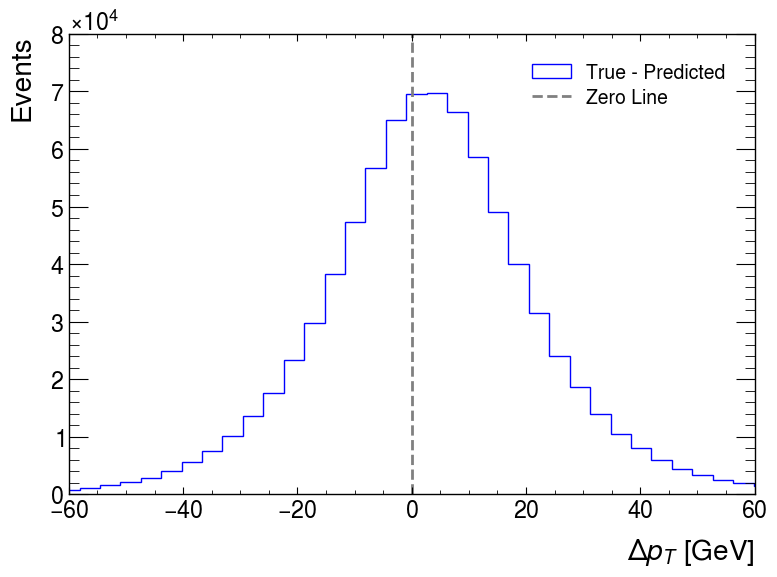

In [74]:
plt.hist(np.array(higgs_pt)-np.array(pred), bins=400, histtype="step", label='True - Predicted', density=False, color='blue')
plt.xlabel(r"$\Delta p_T$ [GeV]")
plt.ylabel("Events")
# plt.title("Predicted vs True Distribution on Validation Set")
plt.xlim(-60, 60)
plt.axvline(0, color='gray', linestyle='--',label='Zero Line')
# plt.ylim(0, 0.05)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig("predicted_minus_true_distribution.png", dpi=300)

In [12]:
import numpy as np

# y_true  –  skutočná hodnota (napr. ditau_higgspt)
# y_pred  –  výstup modelu

y_true=np.array(higgs_pt)
y_pred=np.array(pred)
delta = y_true - y_pred           # reziduá

bias = np.mean(delta)
mae  = np.mean(np.abs(delta))
mse  = np.mean(delta**2)
rmse = np.sqrt(mse)
sigma = np.std(delta)              # štandardná odchýlka chýb

print(f"Bias  : {bias: .2f} GeV")
print(f"MAE   : {mae: .2f} GeV")
print(f"RMSE  : {rmse: .2f} GeV")
print(f"σ(ΔpT): {sigma: .2f} GeV")

Bias  :  3.49 GeV
MAE   :  15.37 GeV
RMSE  :  21.29 GeV
σ(ΔpT):  21.00 GeV


In [5]:

# Prepočet na priemer
higgs_pt = np.array(higgs_pt)
mean_pt = np.mean(higgs_pt)

print(f"Priemerný p_T (ditau_higgspt): {mean_pt:.2f} GeV")

Priemerný p_T (ditau_higgspt): 165.04 GeV


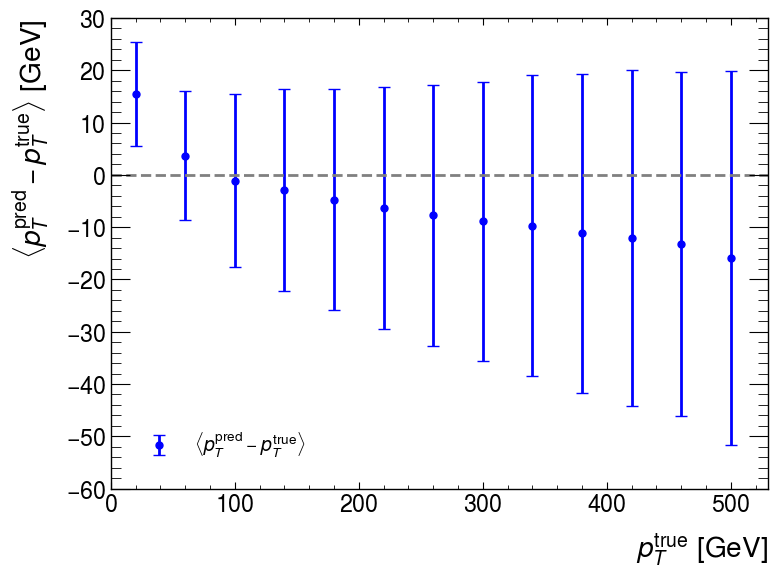

In [64]:
higgs_pt = np.array(higgs_pt)
pred = np.array(pred)

# Biny
bins = np.arange(0, 560, 40)
bin_centers = (bins[:-1] + bins[1:]) / 2

mean_diff = []
std_diff = []

for i in range(len(bins) - 1):
    mask = (higgs_pt >= bins[i]) & (higgs_pt < bins[i + 1])
    if np.any(mask):
        diff = pred[mask] - higgs_pt[mask]
        mean_diff.append(np.mean(diff))
        std_diff.append(np.std(diff))
    else:
        mean_diff.append(np.nan)
        std_diff.append(np.nan)

# Plot
plt.errorbar(bin_centers, mean_diff, yerr=std_diff, fmt='o', capsize=4,
             label=r'$\langle p_T^{\mathrm{pred}} - p_T^{\mathrm{true}} \rangle$', color='blue', markersize=5, elinewidth=2)
plt.xlabel(r'$p_T^{\mathrm{true}}$ [GeV]')
plt.ylabel(r'$\langle p_T^{\mathrm{pred}} - p_T^{\mathrm{true}} \rangle$ [GeV]')
# plt.title('Prediction Bias vs True Higgs $p_T$')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(False)
plt.xlim(0, 530)
plt.legend()
plt.tight_layout()
plt.savefig("mean_residual_plot")
plt.show()


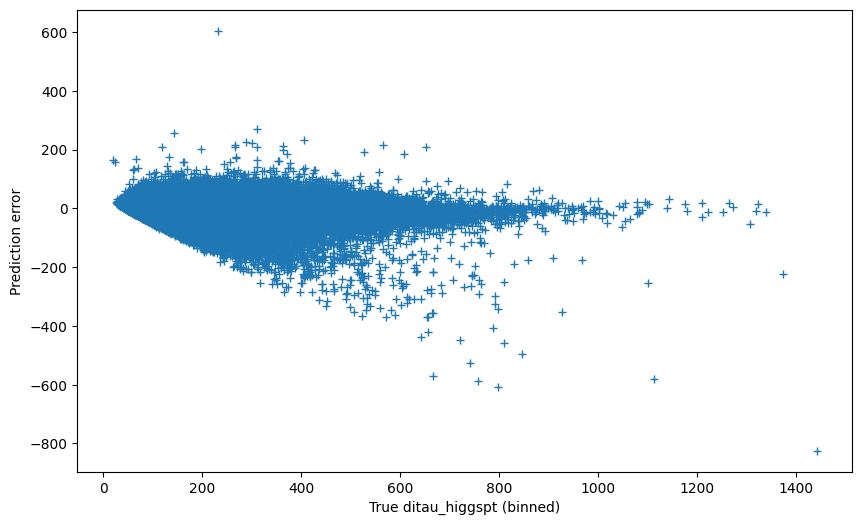

In [29]:
plt.figure(figsize=(10, 6))
plt.errorbar(higgs_pt, diff,fmt="+", capsize=0.05, label="Mean (Pred - True)")
plt.xlabel("True ditau_higgspt (binned)")
plt.ylabel("Prediction error")
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from DatasetClass import DatasetPt
from ModelClass import RegressionModel
from src.helpers import pick_only_target, extract_data

erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_paths=erik_data)
dataset.load_data()

model = RegressionModel(dataset=dataset)
model.prepare_dataset()
model.load()


for features,target in dataset.train_dataset.take(1):
    print("Features shape:", features.shape)
    print("Target shape:", target.shape)



# feature_index = dataset.variables_higgs.index("ditau_higgspt")

# inputs = []

# for x,_ in dataset.val_dataset:
#     input_vec = x[feature_index].numpy()  # len jedna feature sa ponechá
#     inputs.append(input_vec)

# inputs = np.array(inputs)
# print(inputs.shape)


# y_true = np.array(extract_data(inputs)).flatten()
# y_pred = model.model.predict(dataset.val_dataset.batch(100000)).flatten()



# plt.figure(figsize=(10, 6))
# plt.hist(y_true-y_true, bins=1000, histtype='step', label='True Values minus Pred Values', density=True)
# # plt.hist(y_pred, bins=100, histtype='step', label='Predicted Values', density=True)
# plt.xlabel("Output")
# plt.ylabel("Density")
# plt.title("Predicted vs True Distribution on Validation Set")
# # plt.xlim(-70, 70)
# plt.legend()
# plt.grid(True)
# # plt.savefig("predicted_vs_true_distribution.png", dpi=300)

Batching datasets...
Model loaded from /home/kvake/HiggsAnalysisBc/models/PtNet_mmc.keras
Features shape: (36,)
Target shape: ()


2025-07-09 16:18:31.869011: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# 1. Calculate residuals for both models
residuals_nn = y_pred_H125 - y_true_H125
residuals_mmc = y_mmc_H125 - y_true_H125

# 2. Define the bins based on the true mass
n_intervals = 20
true_mass_bins = np.linspace(20.0, 200.0, n_intervals + 1)
print(f"True mass bins: {true_mass_bins}")
# 3. Calculate binned statistics for the NN model
mean_residuals_nn, _, _ = stats.binned_statistic(
    y_true_H125, residuals_nn, statistic='mean', bins=true_mass_bins
)
std_residuals_nn, _, _ = stats.binned_statistic(
    y_true_H125, residuals_nn, statistic='std', bins=true_mass_bins
)

# 4. Calculate binned statistics for the MMC model
mean_residuals_mmc, _, _ = stats.binned_statistic(
    y_true_H125, residuals_mmc, statistic='mean', bins=true_mass_bins
)
std_residuals_mmc, _, _ = stats.binned_statistic(
    y_true_H125, residuals_mmc, statistic='std', bins=true_mass_bins
)

# 5. Count the number of samples per bin (same for both models)
count_per_bin, _, _ = stats.binned_statistic(
    y_true_H125, y_true_H125, statistic='count', bins=true_mass_bins
)

# 6. Calculate the Standard Error of the Mean (SEM) for both models
# Ensure we don't divide by zero for bins with no data
count_per_bin_float = count_per_bin.astype(float)
# Replace zero counts with NaN to avoid division errors and propagate NaN
count_per_bin_float[count_per_bin_float == 0] = np.nan

sem_nn = std_residuals_nn / np.sqrt(count_per_bin_float)
sem_mmc = std_residuals_mmc / np.sqrt(count_per_bin_float)

# 7. Prepare data for plotting
bin_centers = (true_mass_bins[:-1] + true_mass_bins[1:]) / 2


plt.figure(figsize=(10, 7))
plt.axhline(0, color='black', linestyle='--', linewidth=0.5, label='Ideal')

plt.errorbar(
    bin_centers,
    mean_residuals_nn,
    yerr=sem_nn,
    fmt='o',  # Format: 'o' for circles
    capsize=5,
    markersize=5,
    color='crimson',
    label='NN (Augmented)',
    alpha=0.8,
    capthick=1,
    elinewidth=1
)


plt.xlabel(r'Mass [GeV]', fontsize=16, horizontalalignment='right', x=1)
plt.ylabel(r'Mean Residual [GeV]', fontsize=16, horizontalalignment='right', y=1)
plt.tick_params(axis='both', which='major', labelsize=14, direction='in', length=6, width=1)
plt.legend(fontsize=12)
plt.savefig('out/mean_residual_plot.png', dpi=300)
plt.tight_layout()
plt.grid(False)
plt.show()

NameError: name 'y_pred_H125' is not defined